__Exercício 1: Tratando séries temporais indexadas por tempo__

* Na instrução prática anterior foram utilizadas séries temporais de estações meteorológicas para extrair dados de diferentes anos e comparar as informações sobre temperaturas e e precipitações. Em uma das tarefas se solicitou para criar um ``MultiIndex`` para agregar os dois datasets em apenas um com as dimensões anos, messes do ano e dias do mês. Na tarefa seguinte foi construído um ``DateTimeIndex`` para as séries de dados. Com base no dataset indexado com o ``DateTimeIndex``. 
1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.
2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.
3. Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.
4. Considere uma aproximação para as estações do ano no brasil dada por: Verão (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que mostre como se comportaram as temperaturas máxima e mínima de cada uma das estações nos tres anos. 
5. Repare que os dados de cada estação são monitorando de hora em hora. Considere os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre com se comportou a temperatura  temperatura media o dia 28 de setembro  em cada um dos intervalos do dia dos três anos.

<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P008
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ avançado.

In [66]:
import pandas as pd

df2003 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2013 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2023 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)

df2003.drop(["Unnamed: 19"], axis=1, inplace=True)
df2013 .drop(["Unnamed: 19"], axis=1, inplace=True)
df2023.drop(["Unnamed: 19"], axis=1, inplace=True)

df2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)

df = pd.concat([df2003,df2013,df2023])
df["HORA (UTC)"] = df["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
data = df["DATA (YYYY-MM-DD)"].values
index = pd.DatetimeIndex(data, name="DATA")
df.drop("DATA (YYYY-MM-DD)", axis=1, inplace=True)
df.set_index(index, inplace=True)

In [67]:
df

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
DATA,,,,,,,,,,,,,,,,,,
2003-01-01,0,0.0,886.9,887.0,886.5,-9999.0,20.3,18.8,20.4,20.2,18.9,18.7,91.0,90.0,91.0,308.0,2.1,1.4
2003-01-01,1,0.0,887.3,887.3,886.9,-9999.0,19.9,18.5,20.3,19.9,18.8,18.5,92.0,91.0,92.0,302.0,2.2,1.3
2003-01-01,2,0.0,887.8,887.8,887.3,-9999.0,19.8,18.5,20.1,19.8,18.8,18.4,92.0,92.0,92.0,302.0,2.7,1.6
2003-01-01,3,0.0,886.9,887.8,886.9,-9999.0,19.5,18.5,19.8,19.5,18.6,18.4,94.0,92.0,94.0,295.0,3.4,2.0
2003-01-01,4,0.0,886.8,886.9,886.7,-9999.0,19.2,18.0,19.5,19.2,18.5,18.0,94.0,93.0,93.0,313.0,3.9,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,0.0,884.2,885.2,884.2,1252.2,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1
2023-12-31,20,0.0,883.7,884.3,883.7,1178.8,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9
2023-12-31,21,0.0,883.5,883.7,883.4,873.0,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7


In [68]:
mi = []
for columns in df.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("PRESSÃO",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("TEMPERATURA",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("UMIDADE",columns)
    if(columns.find("VENTO")>-1):
        a = ("VELOCIDADE DO VENTO",columns)
    mi.append(a)

df.columns = pd.MultiIndex.from_tuples(mi)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-01-01          0                              0.0   
2003-01-01          1                              0.0   
2003-01-01          2                              0.0   
2003-01-01          3                              0.0   
2003-01-01          4                              0.0   
...               ...                              ...   
2023-12-31         19                              0.0   
2023-12-31         20                              0.0   
2023-12-31         21                              0.0   
2023-12-31         22                              0.0   
2023-12-31         23                              0.0   

                                                         PRESSÃO  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
...                                                       ...      
2023-12-31                                              884.2      
2023-12-31                                              883.7      
2023-12-31                                              883.5      
2023-12-31                                              884.5      
2023-12-31                                              885.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
...                                                    ...   
2023-12-31                                           885.2   
2023-12-31                                           884.3   
2023-12-31                                           883.7   
2023-12-31                                           884.5   
2023-12-31                                           885.3   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA                                                          
2003-01-01                                            886.5   
2003-01-01                                            886.9   
2003-01-01                                            887.3   
2003-01-01                                            886.9   
2003-01-01                                            886.7   
...                                                     ...   
2023-12-31                                            884.2   
2023-12-31                                            883.7   
2023-12-31                                            883.4   
2023-12-31                                            883.5   
2023-12-31                                            884.5   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
DATA                                 
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
...                            ...   
2023-12-31                  1252.2   
2023-12-31                  1178.8   
2023-12-31                   873.0   
2023-12-31                   104.0   

In [69]:
def mesParaEstacao(mes):
    if mes <= 3:
        return "VERÃO"
    if mes <=6:
        return "OUTONO"
    if mes<=9:
        return "INVERNO"
    return "PRIMAVERA"

estacao = [mesParaEstacao(data) for data in df.index.month]
df["ESTAÇÃO"] = estacao


In [138]:
def hrParaIntervalo(hr):
    if hr <= 6:
        return "MADRUGADA"
    if hr <= 12:
        return "MANHÃ"
    if hr <= 18:
        return "TARDE"
    return "NOITE"

df["INTERVALO"] = df["HORA (UTC)"].apply(hrParaIntervalo)

df.head(24)

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-01-01          0                              0.0   
2003-01-01          1                              0.0   
2003-01-01          2                              0.0   
2003-01-01          3                              0.0   
2003-01-01          4                              0.0   
2003-01-01          5                              0.0   
2003-01-01          6                              0.0   
2003-01-01          7                              0.0   
2003-01-01          8                              0.0   
2003-01-01          9                              0.0   
2003-01-01         10                              0.0   
2003-01-01         11                              0.0   
2003-01-01         12                              0.0   
2003-01-01         13                              0.0   
2003-01-01         14                              0.0   
2003-01-01         15                              0.8   
2003-01-01         16                              0.0   
2003-01-01         17                              1.4   
2003-01-01         18                              2.8   
2003-01-01         19                              0.4   
2003-01-01         20                              0.0   
2003-01-01         21                              0.0   
2003-01-01         22                              0.0   
2003-01-01         23                              0.0   

                                                         PRESSÃO  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
2003-01-01                                              886.4      
2003-01-01                                              885.7      
2003-01-01                                              885.6      
2003-01-01                                              885.6      
2003-01-01                                              886.3      
2003-01-01                                              887.2      
2003-01-01                                              887.9      
2003-01-01                                              888.1      
2003-01-01                                              887.7      
2003-01-01                                              887.2      
2003-01-01                                              886.8      
2003-01-01                                              886.1      
2003-01-01                                              885.4      
2003-01-01                                              884.7      
2003-01-01                                              884.2      
2003-01-01                                              884.5      
2003-01-01                                              884.9      
2003-01-01                                              885.7      
2003-01-01                                              886.5      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
2003-01-01                                           886.9   
2003-01-01                                       

In [71]:
tempMedia = df.groupby([df.index.date])["TEMPERATURA"].mean()

tempMedia.index = pd.to_datetime(tempMedia.index)

precipAcum = df.groupby(df.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()

tempMedia


TEMPERATURA  \
           TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
2003-01-01                                    21.091667   
2003-01-02                                    22.233333   
2003-01-03                                    21.658333   
2003-01-04                                    21.350000   
2003-01-05                                    21.879167   
...                                                 ...   
2023-12-27                                    22.979167   
2023-12-28                                    22.475000   
2023-12-29                                    24.095833   
2023-12-30                                    23.033333   
2023-12-31                                    22.025000   

                                                 \
           TEMPERATURA DO PONTO DE ORVALHO (°C)   
2003-01-01                            18.250000   
2003-01-02                            18.033333   
2003-01-03                            18.266667   
2003-01-04                            17.716667   
2003-01-05                            17.162500   
...                                         ...   
2023-12-27                            17.862500   
2023-12-28                            18.550000   
2023-12-29                            18.770833   
2023-12-30                            18.995833   
2023-12-31                            18.258333   

                                                       \
           TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
2003-01-01                                  21.733333   
2003-01-02                                  22.683333   
2003-01-03                                  22.279167   
2003-01-04                                  21.820833   
2003-01-05                                  22.433333   
...                                               ...   
2023-12-27                                  23.858333   
2023-12-28                                  23.595833   
2023-12-29                                  24.875000   
2023-12-30                                  23.841667   
2023-12-31                                  22.600000   

                                                       \
           TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
2003-01-01                                  20.600000   
2003-01-02                                  21.658333   
2003-01-03                                  21.112500   
2003-01-04                                  20.850000   
2003-01-05                                  21.404167   
...                                               ...   
2023-12-27                                  22.200000   
2023-12-28                                  21.608333   
2023-12-29                                  23.308333   
2023-12-30                                  22.358333   
2023-12-31                                  21.466667   

                                                             \
           TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
2003-01-01                                        18.733333   
2003-01-02                                        18.483333   
2003-01-03                                        18.708333   
2003-01-04                                        18.220833   
2003-01-05                                        17.683333   
...                                                     ...   
2023-12-27                                        18.550000   
2023-12-28                                        19.237500   
2023-12-29                                        19.375000   
2023-12-30                                        19.462500   
2023-12-31                                        18.791667   

                                                             
           TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
2003-01-01                                        17.929167  
2003-01-02                                        17.533333  
2003-01-03                                        17.754167 

In [72]:
import matplotlib.pyplot as plt

#### 1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.

In [73]:

anos = [2003,2013,2023]

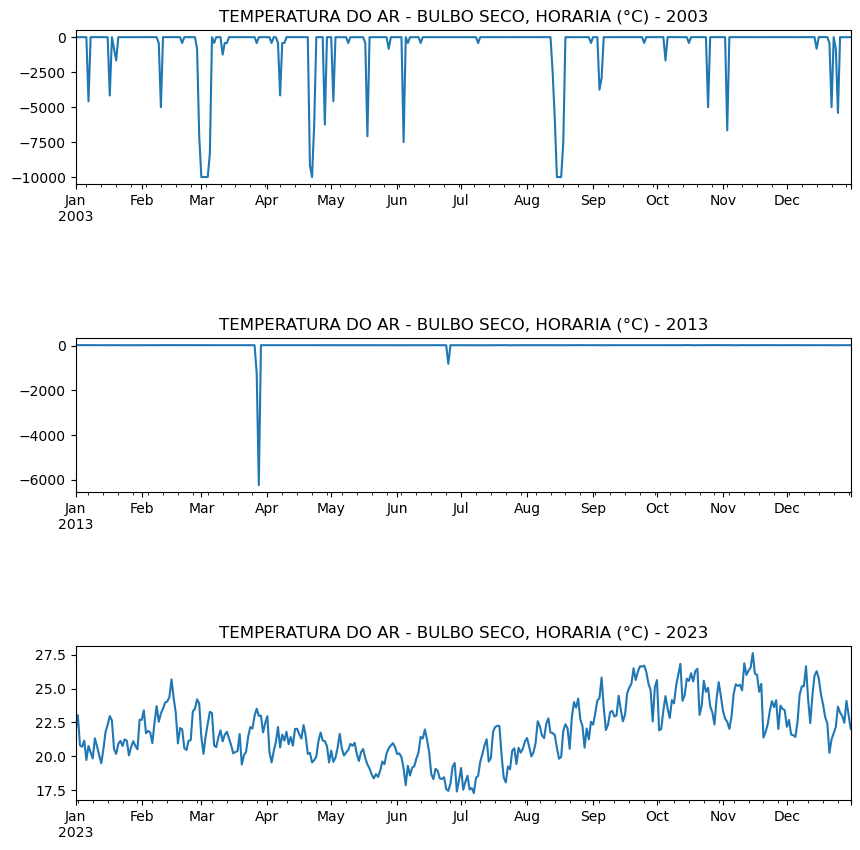

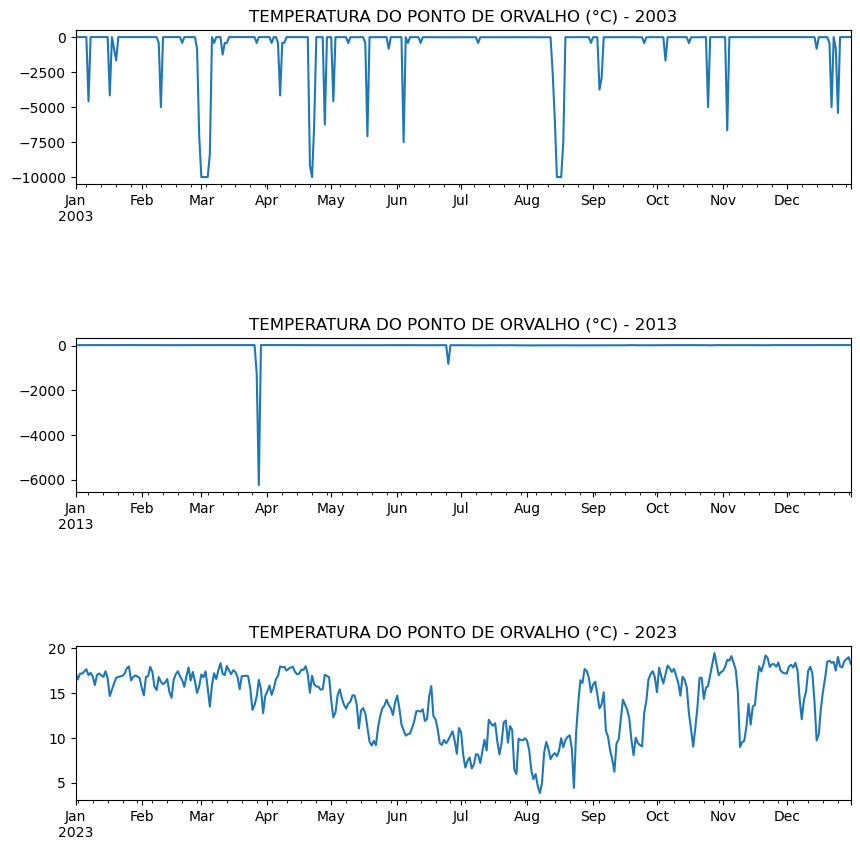

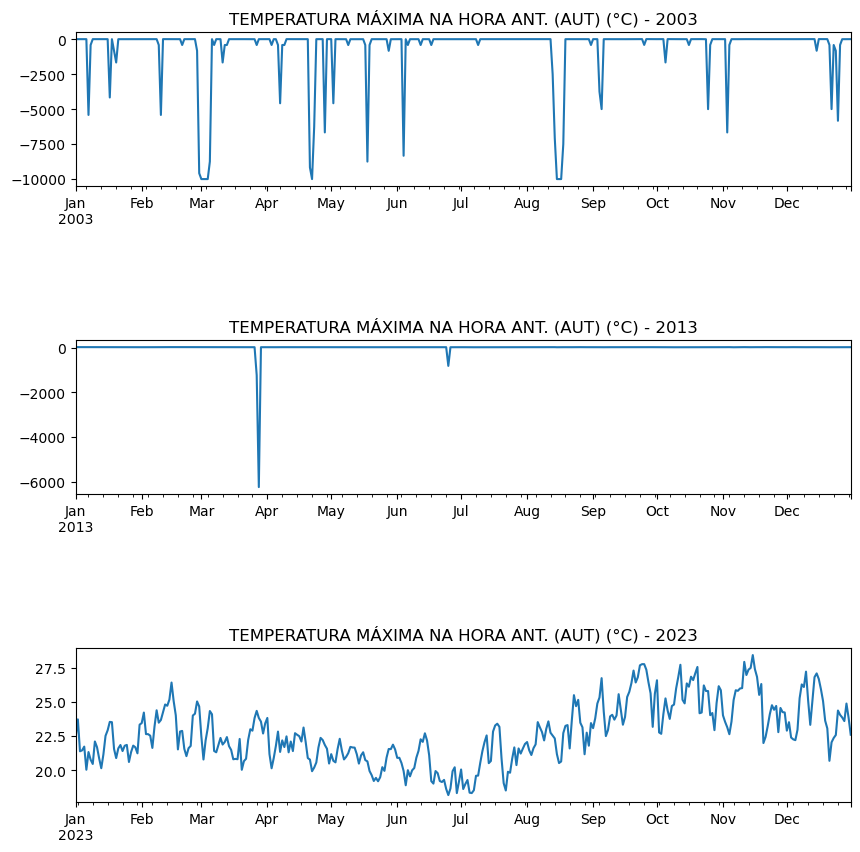

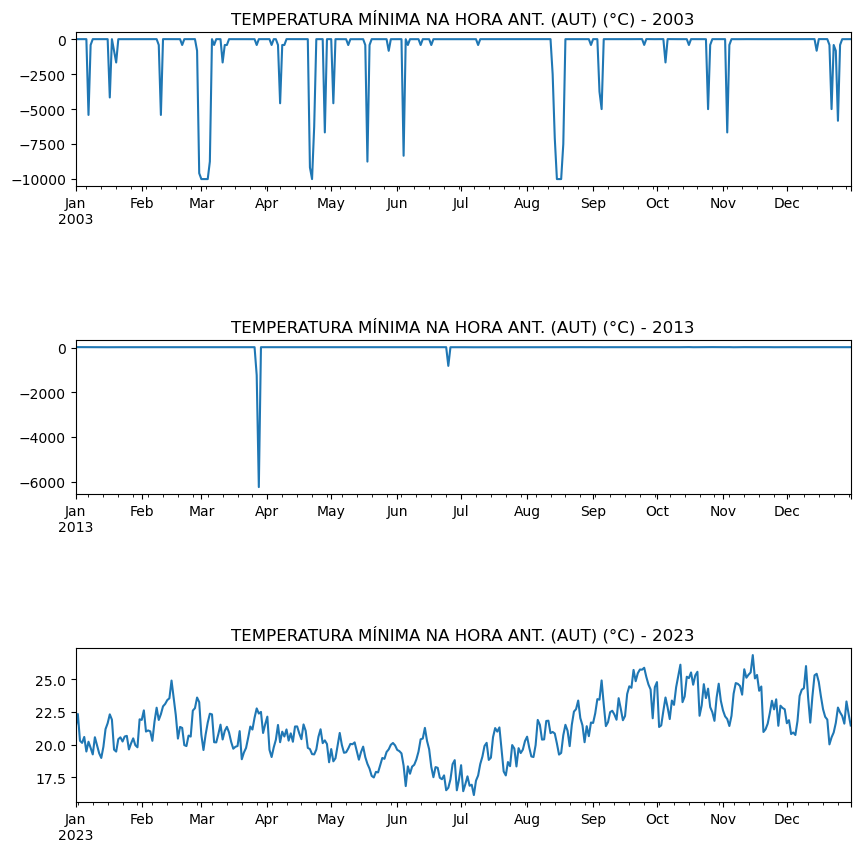

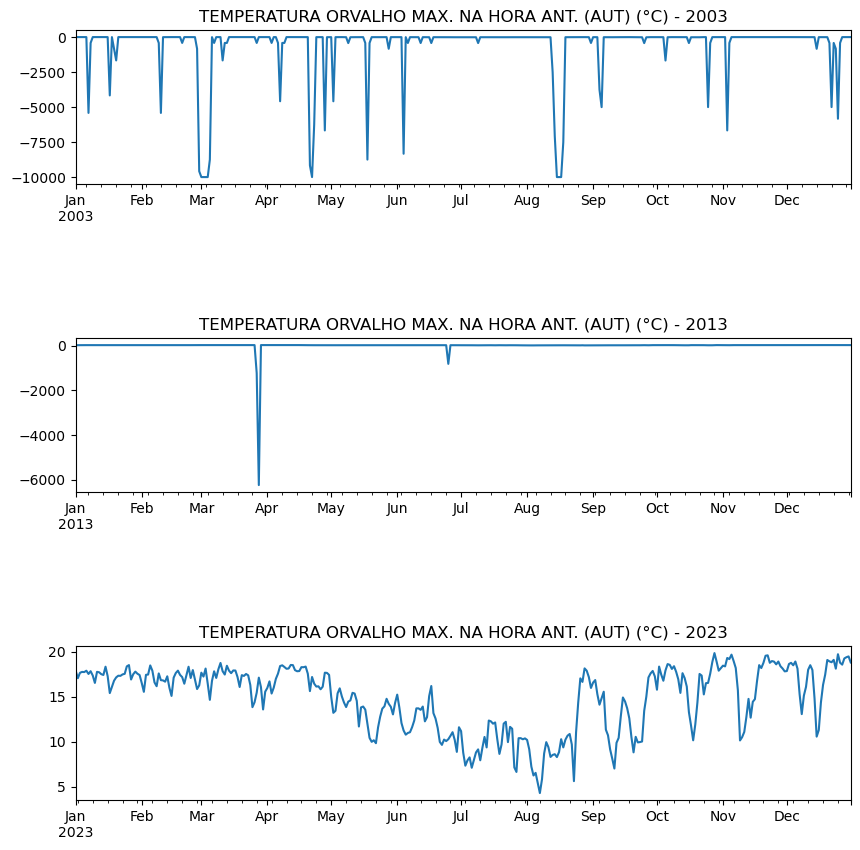

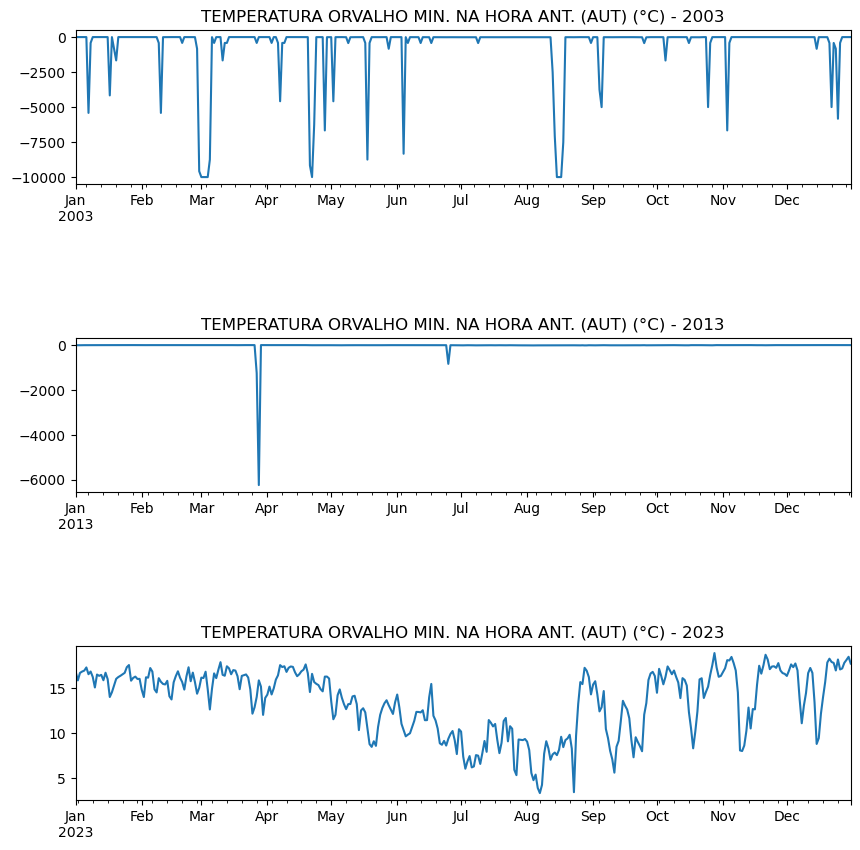

In [74]:


for j in tempMedia.columns.to_list():
    fig, ax = plt.subplots(nrows=len(anos),ncols=1)
    for i,ano in enumerate(anos):
        tempMedia[tempMedia.index.year==ano][j].plot(ax=ax[i],figsize = (10,10))
        ax[i].title.set_text(str(j[1])+" - "+str(ano))
    plt.subplots_adjust(wspace=1,hspace=1)


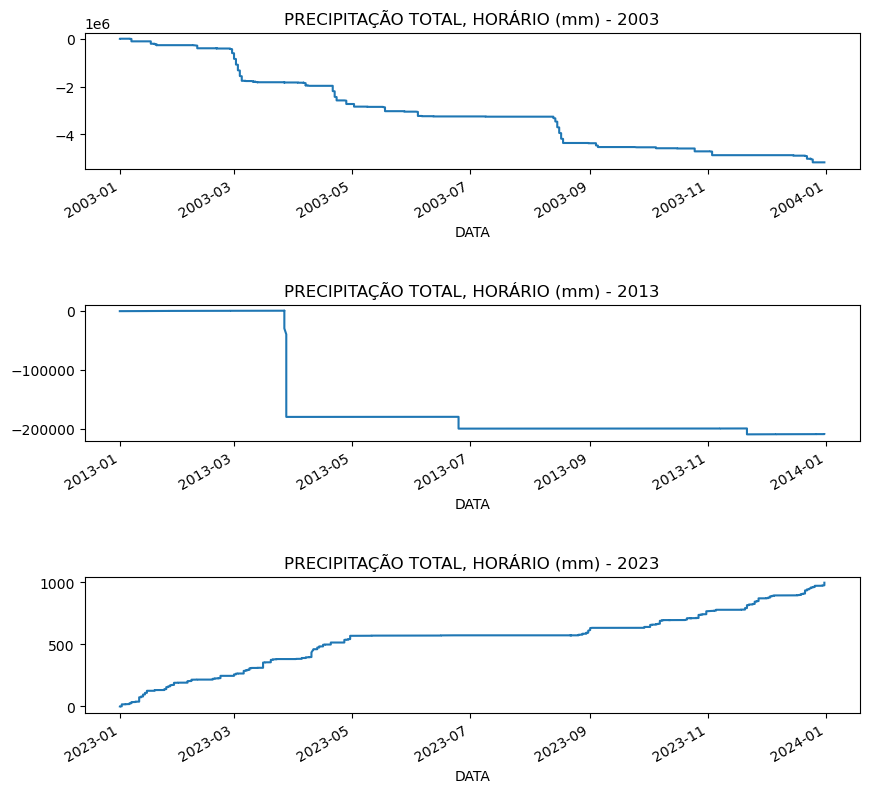

In [75]:

fig, ax = plt.subplots(nrows=len(anos),ncols=1,figsize = (10,10))

for i,ano in enumerate(anos):
    precipAcum[precipAcum.index.year==ano].plot(ax=ax[i])
    ax[i].title.set_text(precipAcum.name+" - "+str(ano))

plt.subplots_adjust(wspace=1,hspace=1)



### 2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.


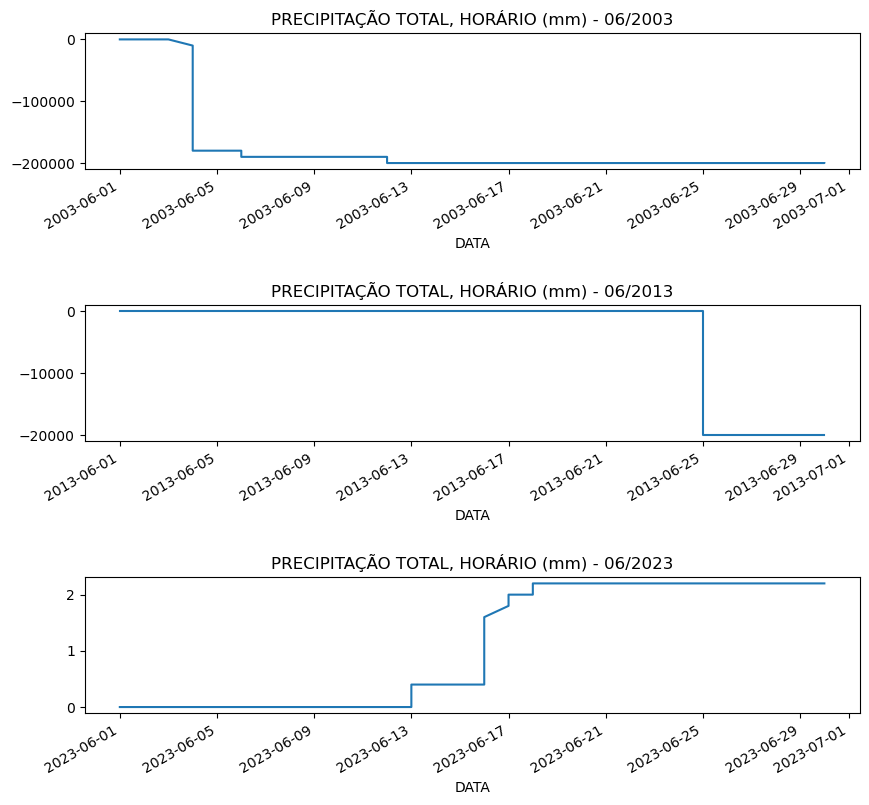

In [76]:
precipAcumJun = df[df.index.month==6]

precipAcumJun.index = pd.to_datetime(precipAcumJun.index)
precipAcumJun = precipAcumJun.groupby(precipAcumJun.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()

fig, ax = plt.subplots(nrows=len(anos),ncols=1)

for i,ano in enumerate(anos):
    precipAcumJun[precipAcumJun.index.year==ano].plot(ax=ax[i],figsize = (10,10))
    ax[i].title.set_text(precipAcumJun.name+" - 06/"+str(ano))

plt.subplots_adjust(wspace=1,hspace=1)


### 3. Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.

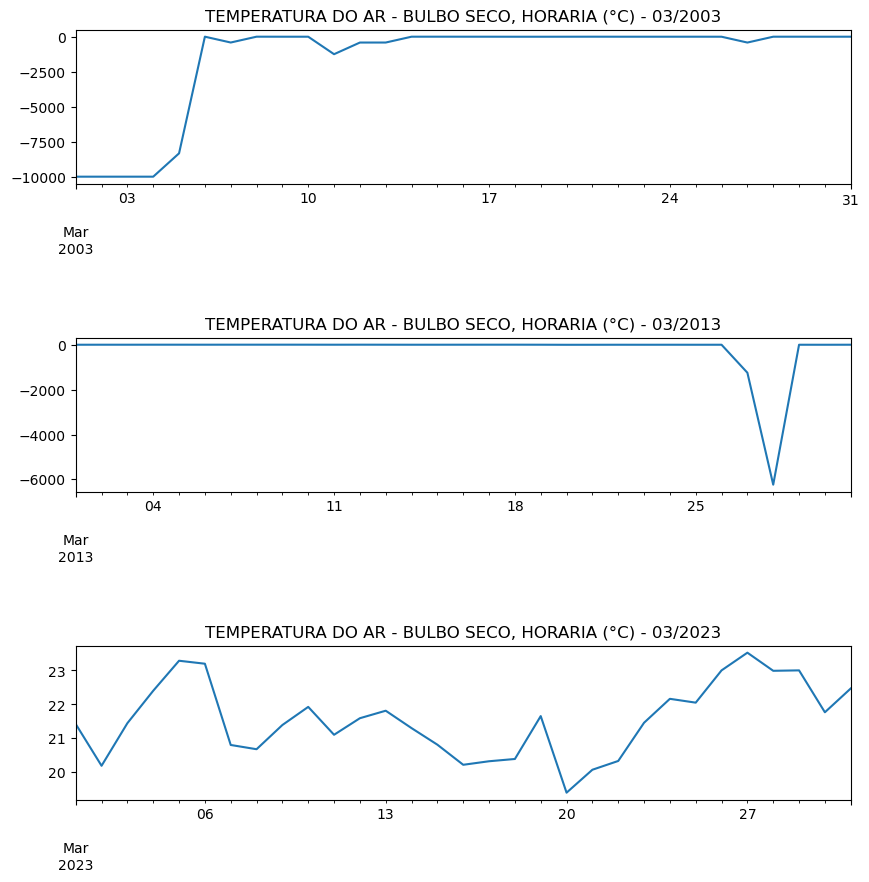

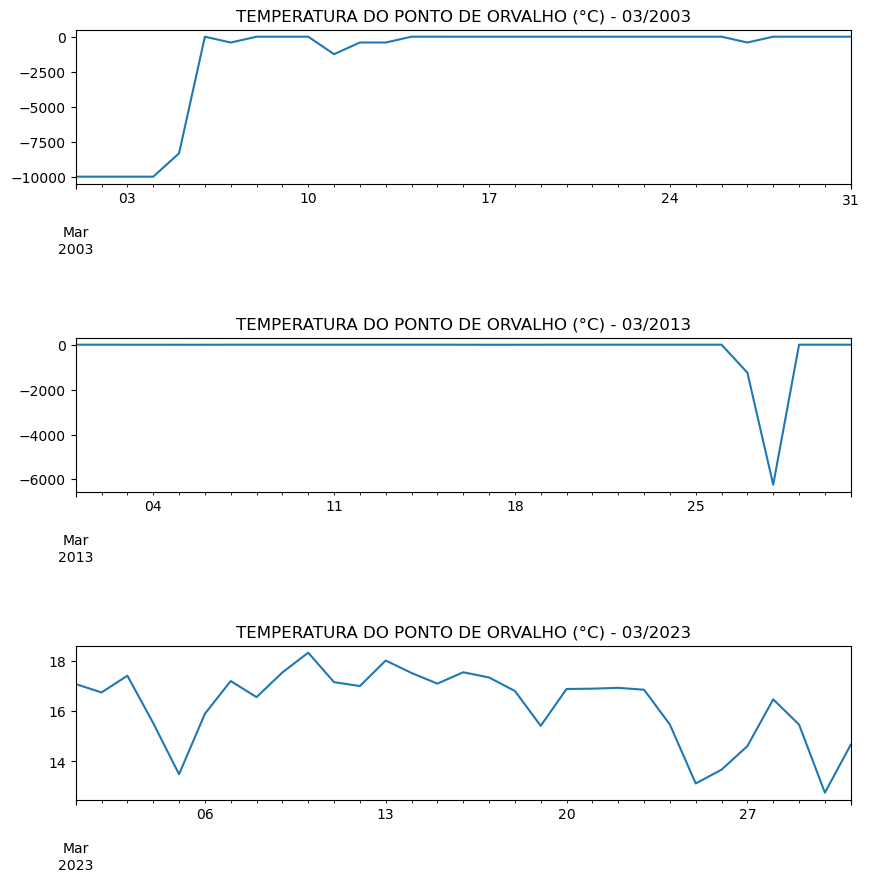

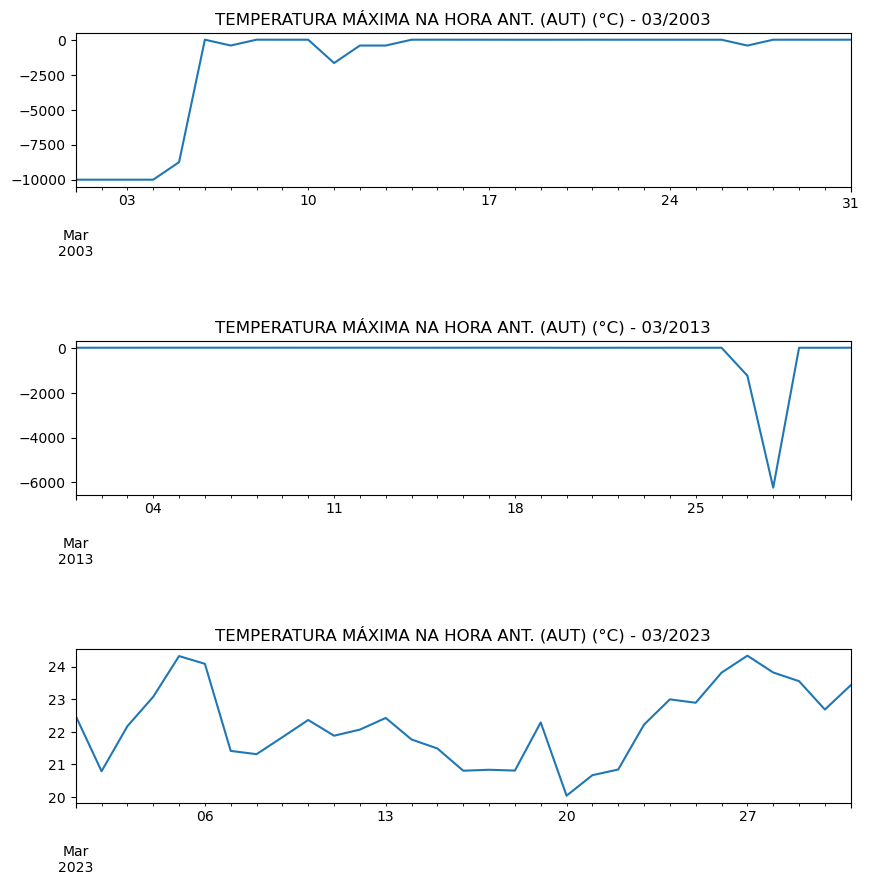

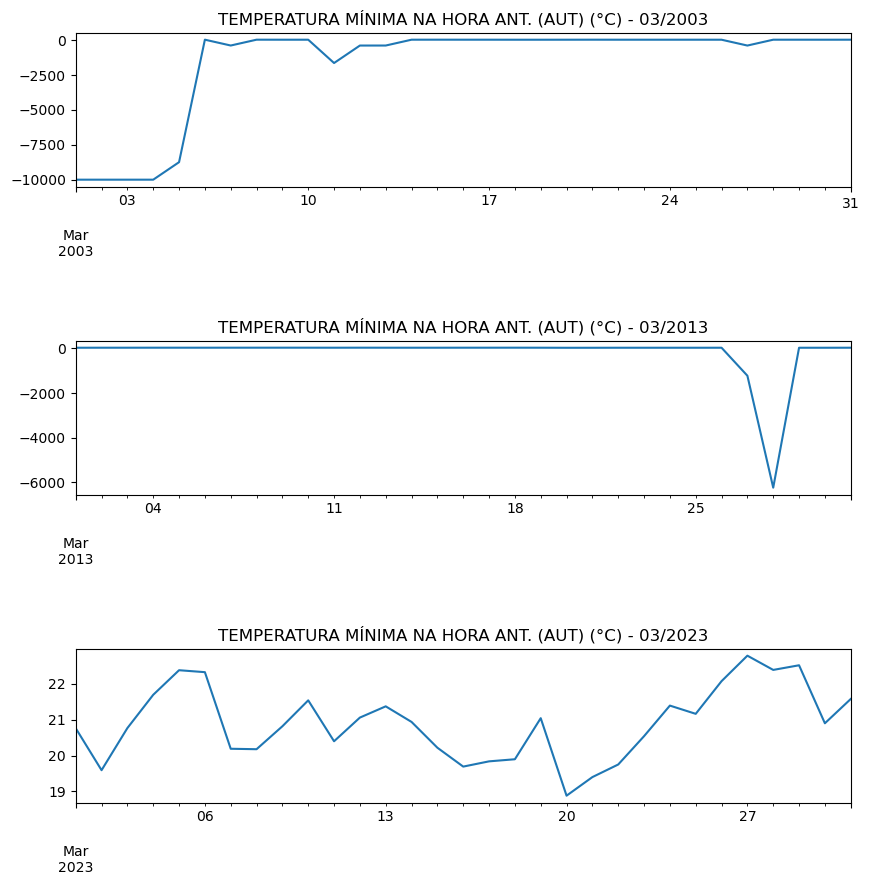

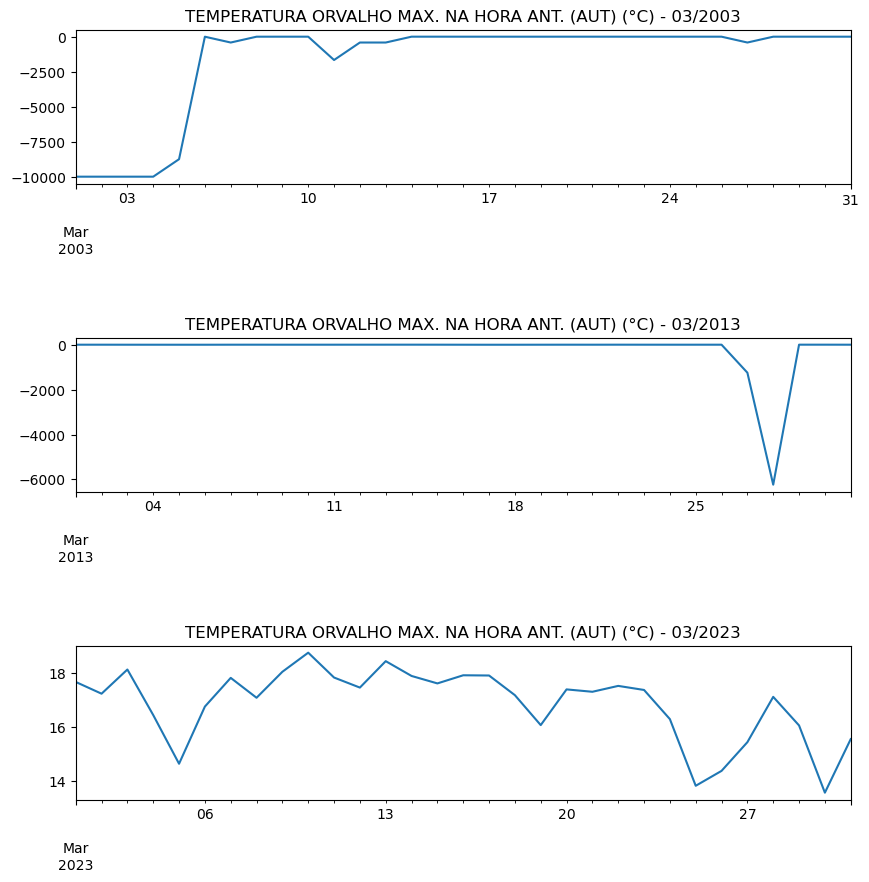

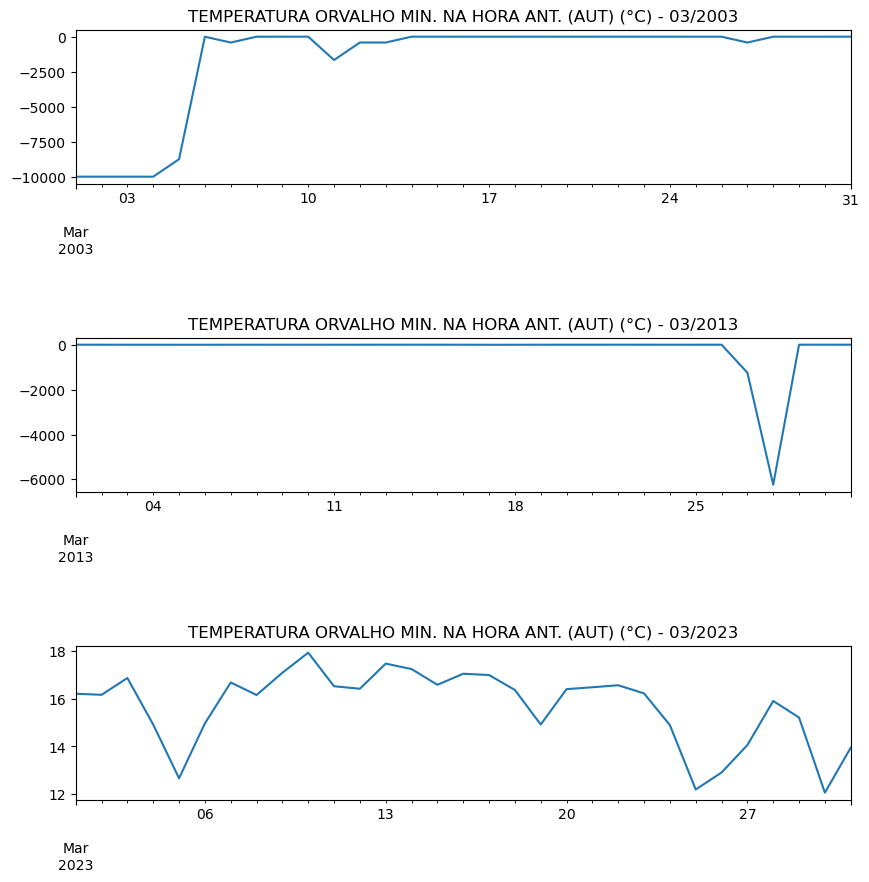

In [77]:
tempMediaMar = df[df.index.month==3]
tempMediaMar = tempMediaMar.groupby([tempMediaMar.index.date])["TEMPERATURA"].mean()

tempMediaMar.index = pd.to_datetime(tempMediaMar.index)

for j in tempMediaMar.columns.to_list():
    fig, ax = plt.subplots(nrows=len(anos),ncols=1)
    for i,ano in enumerate(anos):
        tempMediaMar[tempMediaMar.index.year==ano][j].plot(ax=ax[i],figsize = (10,10))
        ax[i].title.set_text(str(j[1])+" - 03/"+str(ano))
    plt.subplots_adjust(wspace=1,hspace=1)

### 4. Considere uma aproximação para as estações do ano no brasil dada por: Verão (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que mostre como se comportaram as temperaturas máxima e mínima de cada uma das estações nos tres anos. 


In [78]:
tempPorEst = df.groupby([df.index.year,"ESTAÇÃO"])["TEMPERATURA"].agg(["max","min"])
tempPorEst

TEMPERATURA          \
               TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           
                                                        max     min   
DATA ESTAÇÃO                                                          
2003 INVERNO                                           33.0 -9999.0   
     OUTONO                                            28.8 -9999.0   
     PRIMAVERA                                         32.7 -9999.0   
     VERÃO                                             29.1 -9999.0   
2013 INVERNO                                           32.6    11.0   
     OUTONO                                            28.1 -9999.0   
     PRIMAVERA                                         31.0    14.3   
     VERÃO                                             30.2 -9999.0   
2023 INVERNO                                           33.5     9.6   
     OUTONO                                            29.0    10.3   
     PRIMAVERA                                         34.4    16.5   
     VERÃO                                             30.4    14.9   

                                                             \
               TEMPERATURA DO PONTO DE ORVALHO (°C)           
                                                max     min   
DATA ESTAÇÃO                                                  
2003 INVERNO                                   17.4 -9999.0   
     OUTONO                                    19.5 -9999.0   
     PRIMAVERA                                 19.6 -9999.0   
     VERÃO                                     20.1 -9999.0   
2013 INVERNO                                   19.0    -1.6   
     OUTONO                                    20.4 -9999.0   
     PRIMAVERA                                 20.4     6.5   
     VERÃO                                     20.5 -9999.0   
2023 INVERNO                                   19.3    -1.1   
     OUTONO                                    20.4     5.2   
     PRIMAVERA                                 21.5     5.3   
     VERÃO                                     19.7    10.4   

                                                                   \
               TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)           
                                                      max     min   
DATA ESTAÇÃO                                                        
2003 INVERNO                                         33.2 -9999.0   
     OUTONO                                          29.6 -9999.0   
     PRIMAVERA                                       33.1 -9999.0   
     VERÃO                                           30.0 -9999.0   
2013 INVERNO                                         32.7    11.8   
     OUTONO                                          28.8 -9999.0   
     PRIMAVERA                                       31.9    14.4   
     VERÃO                                           31.1 -9999.0   
2023 INVERNO                                         34.2    10.7   
     OUTONO                                          29.8    10.7   
     PRIMAVERA                                       34.6    17.2   
     VERÃO                                           30.9    15.4   

                                                                   \
               TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)           
                                                      max     min   
DATA ESTAÇÃO                                                        
2003 INVERNO                                         32.4 -9999.0   
     OUTONO                                          28.1 -9999.0   
     PRIMAVERA                                       32.2 -9999.0   
     VERÃO                                           28.8 -9999.0   
2013 INVERNO                                         31.5    10.6   
     OUTONO                                          27.0 -9999.0   
     PRIMAVERA                                       29.7    14.1   
     VERÃO                            

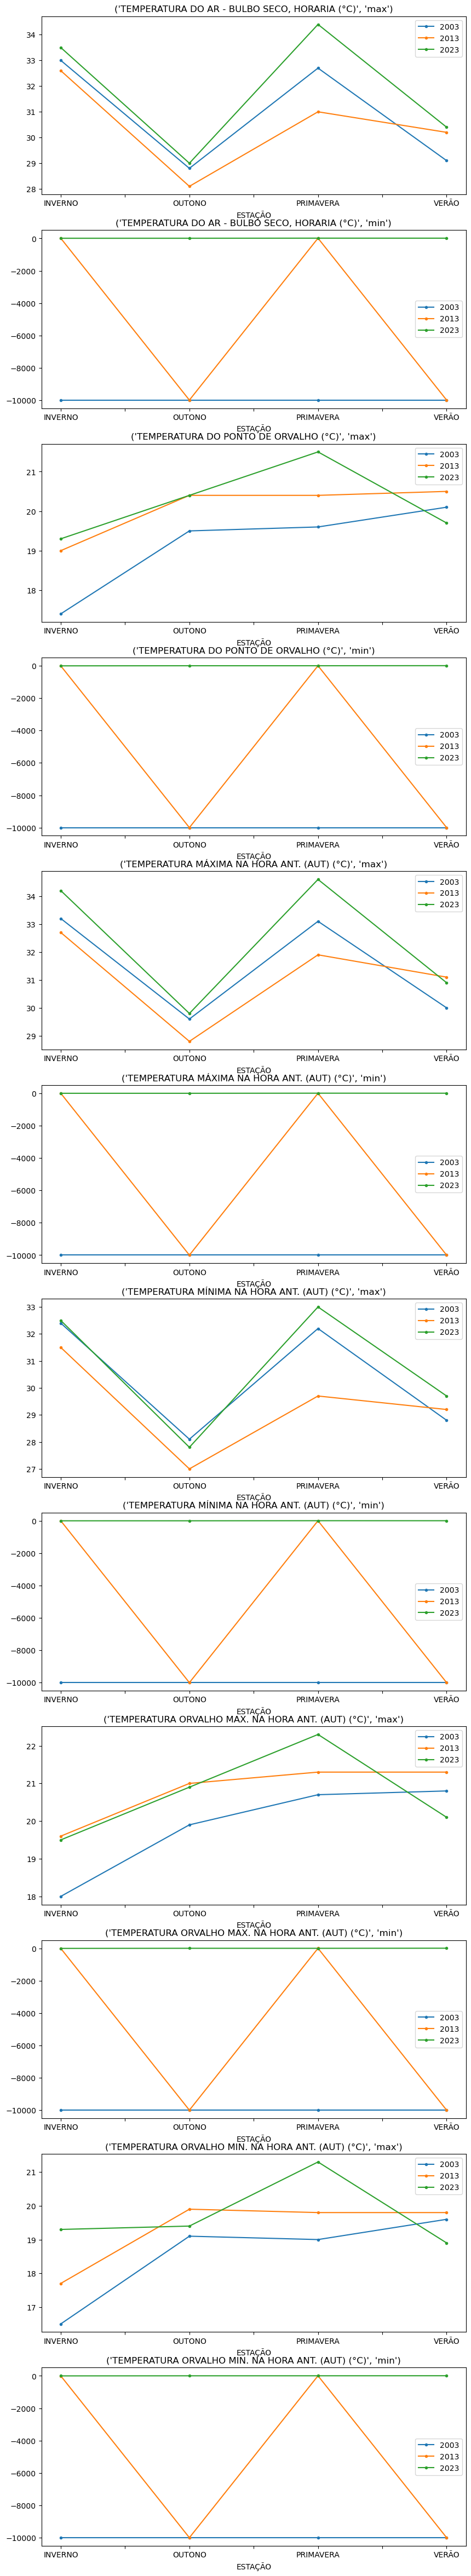

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [124]:


fig, axes = plt.subplots(nrows=len(tempPorEst.columns.to_list()),ncols=1);
    
for j, coluna in enumerate(tempPorEst.columns.to_list()):
    plt.figure();
    for ano in anos:
        tempPorEst.xs(ano,level="DATA")[coluna].plot(ax=axes[j],figsize=(10,60),style=".-");
        axes[j].title.set_text(coluna[1:3]);
        axes[j].legend(anos);



### 5. Repare que os dados de cada estação são monitorando de hora em hora. Considere os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre com se comportou a temperatura  temperatura media o dia 28 de setembro  em cada um dos intervalos do dia dos três anos.


In [139]:
tempMedia28_09 = df[df.index.month==9]
tempMedia28_09 = tempMedia28_09[tempMedia28_09.index.day==28]

tempMedia28_09 = tempMedia28_09.groupby([tempMedia28_09.index.year,"INTERVALO"])["TEMPERATURA"].mean()
tempMedia28_09

TEMPERATURA  \
               TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
DATA INTERVALO                                                
2003 MADRUGADA                                    21.228571   
     MANHÃ                                        20.600000   
     NOITE                                        22.760000   
     TARDE                                        23.116667   
2013 MADRUGADA                                    24.157143   
     MANHÃ                                        22.200000   
     NOITE                                        23.380000   
     TARDE                                        26.583333   
2023 MADRUGADA                                    22.728571   
     MANHÃ                                        22.333333   
     NOITE                                        25.300000   
     TARDE                                        29.616667   

                                                     \
               TEMPERATURA DO PONTO DE ORVALHO (°C)   
DATA INTERVALO                                        
2003 MADRUGADA                            14.100000   
     MANHÃ                                14.333333   
     NOITE                                13.980000   
     TARDE                                13.816667   
2013 MADRUGADA                            12.942857   
     MANHÃ                                14.566667   
     NOITE                                17.740000   
     TARDE                                14.883333   
2023 MADRUGADA                            17.842857   
     MANHÃ                                18.233333   
     NOITE                                15.000000   
     TARDE                                16.800000   

                                                           \
               TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
DATA INTERVALO                                              
2003 MADRUGADA                                  21.800000   
     MANHÃ                                      21.133333   
     NOITE                                      23.800000   
     TARDE                                      23.350000   
2013 MADRUGADA                                  24.971429   
     MANHÃ                                      22.500000   
     NOITE                                      24.120000   
     TARDE                                      28.033333   
2023 MADRUGADA                                  23.142857   
     MANHÃ                                      22.583333   
     NOITE                                      27.260000   
     TARDE                                      30.183333   

                                                           \
               TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
DATA INTERVALO                                              
2003 MADRUGADA                                  20.957143   
     MANHÃ                                      20.250000   
     NOITE                                      22.500000   
     TARDE                                      22.366667   
2013 MADRUGADA                                  23.928571   
     MANHÃ                                      21.683333   
     NOITE                                      22.600000   
     TARDE                                      25.500000   
2023 MADRUGADA                                  22.485714   
     MANHÃ                                      21.450000   
     NOITE                                      25.020000   
     TARDE                                      28.383333   

                                                                 \
               TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
DATA INTERVALO                                                    
2003 MADRUGADA                                        14.571429   
     MANHÃ                                            14.833333   
     NOITE                                            14.260000   
     TARDE                                

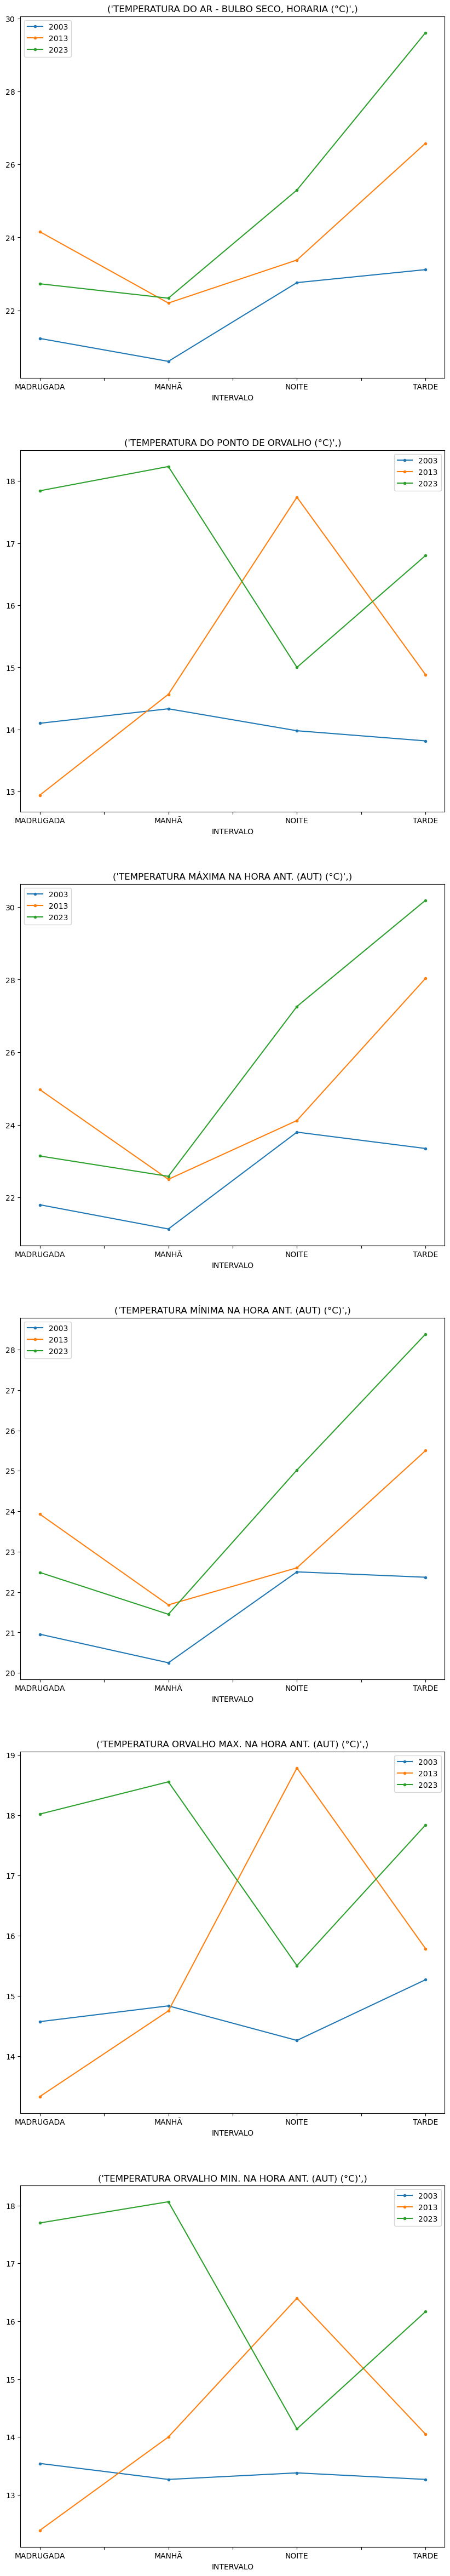

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [140]:
fig, axes = plt.subplots(nrows=len(tempMedia28_09.columns.to_list()),ncols=1);
    
for j, coluna in enumerate(tempMedia28_09.columns.to_list()):
    plt.figure();
    for ano in anos:
        tempMedia28_09.xs(ano,level="DATA")[coluna].plot(ax=axes[j],figsize=(10,60),style=".-");
        axes[j].title.set_text(coluna[1:3]);
        axes[j].legend(anos);